In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import locale
from locale import atof

In [3]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [4]:
data= pd.read_csv("https://raw.githubusercontent.com/jeevanjagadish/ML-Predictions-Projects/master/Internet_user_analyses/List%20of%20Countries%20by%20number%20of%20Internet%20Users%20-%20Sheet1.csv")
data.describe()

,Rank
count,215.000000
mean,108.000000
std,62.209324
min,1.000000
25%,54.500000
50%,108.000000
75%,161.500000
max,215.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Country or Area  215 non-null    object
 1   Internet Users   215 non-null    object
 2   Population       215 non-null    object
 3   Rank             215 non-null    int64 
 4   Percentage       215 non-null    object
 5   Rank.1           215 non-null    object
dtypes: int64(1), object(5)
memory usage: 10.2+ KB


In [6]:
data.head(10)

,Country or Area,Internet Users,Population,Rank,Percentage,Rank.1
0,China,"765,367,947","1,409,517,397",1,54.30%,116
1,India,"461,347,554","1,339,180,127",2,34.45%,145
2,United States,"244,090,854","324,459,463",3,75.23%,68
3,Brazil,"141,206,801","209,288,278",4,67.47%,83
4,Japan,"115,845,120","127,484,450",5,90.87%,23
5,Russia,"109,446,612","143,989,754",6,76.01%,64
6,Indonesia,"85,242,816","263,991,379",7,32.29%,150
7,Mexico,"82,470,752","129,163,276",8,63.85%,92
8,Germany,"69,304,405","82,114,224",9,84.40%,36
9,Philippines,"63,003,313","104,918,090",10,60.05%,103


In [7]:
data['Population']=data['Population'].str.replace(',', '').astype(int)
data['Internet Users']=data['Internet Users'].str.replace(',', '').astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Country or Area  215 non-null    object
 1   Internet Users   215 non-null    int64 
 2   Population       215 non-null    int64 
 3   Rank             215 non-null    int64 
 4   Percentage       215 non-null    object
 5   Rank.1           215 non-null    object
dtypes: int64(3), object(3)
memory usage: 10.2+ KB


In [8]:
data['Users Without Internet']= data['Population'] - data['Internet Users']
data.sort_values("Percentage", axis = 0, ascending = True, 
                 inplace = True, na_position ='last') 

data.head(10)

,Country or Area,Internet Users,Population,Rank,Percentage,Rank.1,Users Without Internet
185,Eritrea,66402,5068831,186,1.31%,209,5002429
115,Niger,2194985,21477348,116,10.22%,197,19282363
142,Papua New Guinea,924955,8251162,143,11.21%,196,7326207
126,Guinea,1449758,12717176,127,11.40%,195,11267418
93,Afghanistan,4068194,35530081,94,11.45%,194,31461887
180,Solomon Islands,72872,611343,181,11.92%,193,538471
130,Haiti,1353986,10981229,131,12.33%,192,9627243
138,Togo,963795,7797694,139,12.36%,191,6833899
112,Mali,2358540,18541980,113,12.72%,190,16183440
136,Sierra Leone,1000575,7557212,137,13.24%,189,6556637


In [9]:
data.sort_values("Users Without Internet", axis = 0, ascending = False, 
                 inplace = True, na_position ='last') 

data.head(10)

,Country or Area,Internet Users,Population,Rank,Percentage,Rank.1,Users Without Internet
1,India,461347554,1339180127,2,34.45%,145,877832573
0,China,765367947,1409517397,1,54.30%,116,644149450
6,Indonesia,85242816,263991379,7,32.29%,150,178748563
24,Nigeria,30557175,190015955,12,27.51%,161,159458780
11,Pakistan,61837331,220800300,25,30.68%,184,158962969
26,Bangladesh,30530435,164669751,27,18.02%,180,134139316
36,Ethiopia,19543075,104957438,37,18.62%,179,85414363
2,United States,244090854,324459463,3,75.23%,68,80368609
65,Democratic Republic of the Congo,7011507,81339988,66,8.62%,200,74328481
3,Brazil,141206801,209288278,4,67.47%,83,68081477


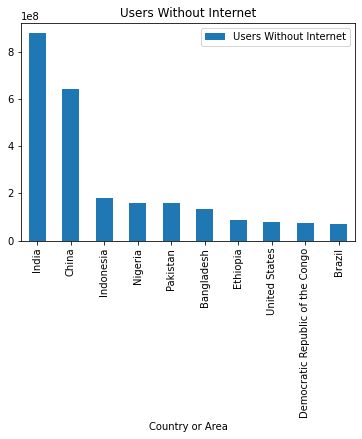

In [10]:
bar_chart= data.head(10).plot.bar(x='Country or Area',y='Users Without Internet',subplots=True)